In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import timedelta
import matplotlib.pyplot as plt




In [128]:
#Import clean tables used in MySQL

teams = pd.read_csv('/Users/jon/Documents/fpl_points_prediction/ERD/Tables/teams.csv', delimiter=";", index_col=False)
positions = pd.read_csv('/Users/jon/Documents/fpl_points_prediction/ERD/Tables/positions.csv', delimiter=";", index_col=False)
seasons = pd.read_csv('/Users/jon/Documents/fpl_points_prediction/ERD/Tables/years.csv', delimiter=";", index_col=False)
players = pd.read_csv('/Users/jon/Documents/fpl_points_prediction/ERD/Tables/players.csv', delimiter=";", index_col=False)
match_data = pd.read_csv('/Users/jon/Documents/fpl_points_prediction/ERD/Tables/match_data.csv', delimiter=";", index_col=False)
player_match_data = pd.read_csv('/Users/jon/Documents/fpl_points_prediction/ERD/Tables/player_match_data_withid.csv', delimiter=";", index_col=False)

In [129]:
#Merge tables used in EDA
merged_data = match_data.merge(player_match_data, left_on='match_id', right_on='match_id', how='inner', indicator=True)
merged_data = teams.merge(merged_data, left_on='team_id', right_on='player_team_id', how='inner')
merged_data = positions.merge(merged_data, left_on='position_id', right_on='position_id', how='inner')

/var/folders/1k/45vk_vqn0z174f0vwyd90vqr0000gn/T/ipykernel_23256/2506720248.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  team_info_season = team_info_season.groupby(["team_name"])["total_points", "xP"].sum().reset_index()


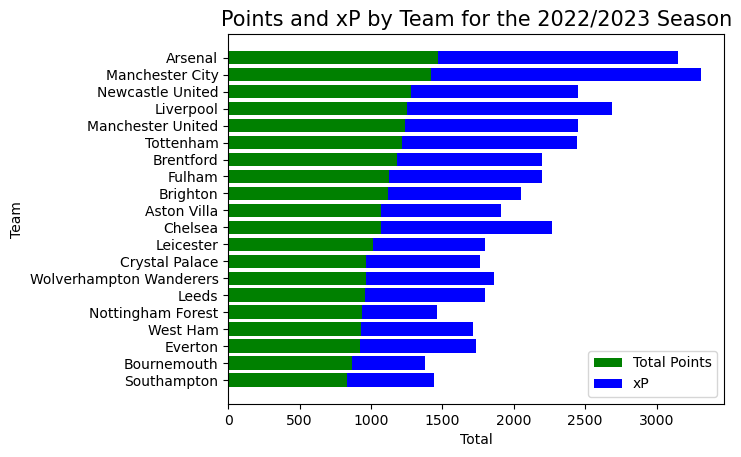

In [70]:
#Plot Points and xP by Team for the 2022/2023 Season
#Filter by season
team_info_season = merged_data[merged_data['season_id_x'] == 3]
#Select data
team_info_season = team_info_season[["team_name","total_points", "xP"]]
#Group data
team_info_season = team_info_season.groupby(["team_name"])["total_points", "xP"].sum().reset_index()
team_info_season = team_info_season.sort_values(by='total_points', ascending=True)

#plot data
plt.barh(team_info_season['team_name'], team_info_season["total_points"], label="Total Points", color="green")
plt.barh(team_info_season['team_name'], team_info_season["xP"], left=team_info_season["total_points"], label="xP", color="blue")
plt.title('Points and xP by Team for the 2022/2023 Season', fontsize=15)
plt.xlabel('Total')
plt.ylabel('Team')
plt.legend()


In [78]:
merged_data["position"].value_counts()

MID    13084
DEF     9673
FWD     3830
GK      2057
Name: position, dtype: int64

/var/folders/1k/45vk_vqn0z174f0vwyd90vqr0000gn/T/ipykernel_23256/101860594.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  points_by_position = points_by_position.groupby(["position"])["total_points", "xP"].mean().reset_index().sort_values(by='total_points')


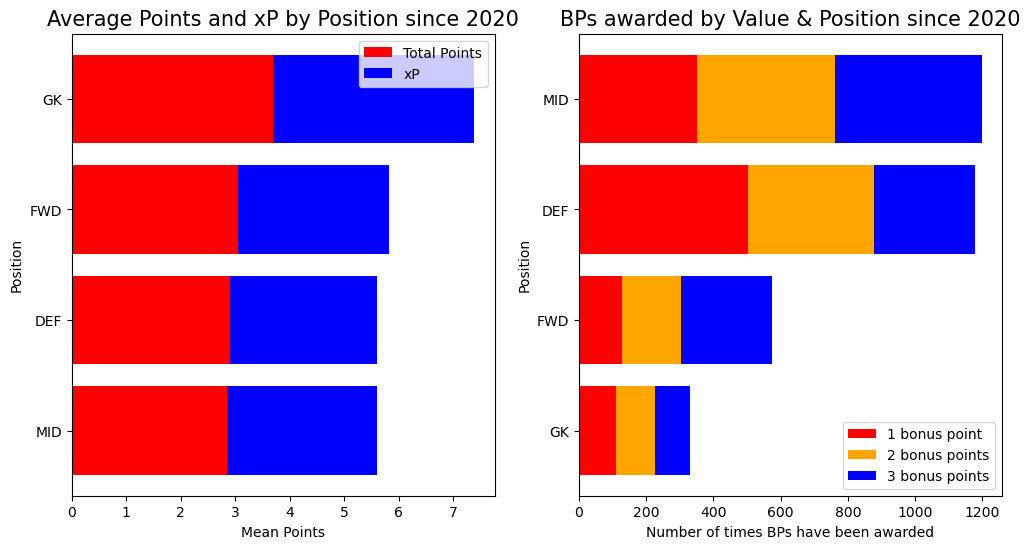

In [125]:
#PLotting "Average Points and xP by Position since 2020" & "BPs awarded by Value & Position since 2020" on the same subplot

#Plot 1 - Average Points and xP
#bonus_points_by_position = merged_data[merged_data['season_id_x'] == 3] -- use if wanting to filter by season
points_by_position = merged_data[["position","total_points", "xP"]]
points_by_position = points_by_position.groupby(["position"])["total_points", "xP"].mean().reset_index().sort_values(by='total_points')

#PLot 2 - BPs awarded by Value & Position
#bonus_points_by_position = merged_data[merged_data['bonus'] == 3] -- use if wanting to filter by season
# Filter the data by type of bonus points, 1, 2, 3
bonus_points_data = merged_data[merged_data['bonus'].isin([1, 2, 3])]
# Group the data by position and bonus points in terms of count
grouped_data = bonus_points_data.groupby(['position', 'bonus']).size().reset_index(name='count')
# Pivot the data to get bonus points as columns
pivoted_data = grouped_data.pivot(index='position', columns='bonus', values='count').reset_index()

#Code to order in terms of total
# Add a column for the total count of bonus points
pivoted_data['total'] = pivoted_data[1] + pivoted_data[2] + pivoted_data[3]
# Sort the data by total count in descending order
pivoted_data = pivoted_data.sort_values(by='total', ascending=True)

#Plotting plots 1 and 2 on the same figure
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

#Plot 1
axs[0].barh(points_by_position['position'], points_by_position["total_points"], label="Total Points", color="red")
axs[0].barh(points_by_position['position'], points_by_position["xP"], left=points_by_position["total_points"], label="xP", color="blue")
axs[0].set_title('Average Points and xP by Position since 2020', fontsize=15)
axs[0].set_xlabel('Mean Points')
axs[0].set_ylabel('Position')
axs[0].legend()

#Plot 2
axs[1].barh(pivoted_data['position'], pivoted_data[1], label='1 bonus point', color='red')
axs[1].barh(pivoted_data['position'], pivoted_data[2], left=pivoted_data[1], label='2 bonus points', color='orange')
axs[1].barh(pivoted_data['position'], pivoted_data[3], left=pivoted_data[1]+pivoted_data[2], label='3 bonus points', color='blue')
axs[1].set_title('BPs awarded by Value & Position since 2020', fontsize=15)
axs[1].set_xlabel('Number of times BPs have been awarded')
axs[1].set_ylabel('Position')
axs[1].legend()

/Users/jon/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


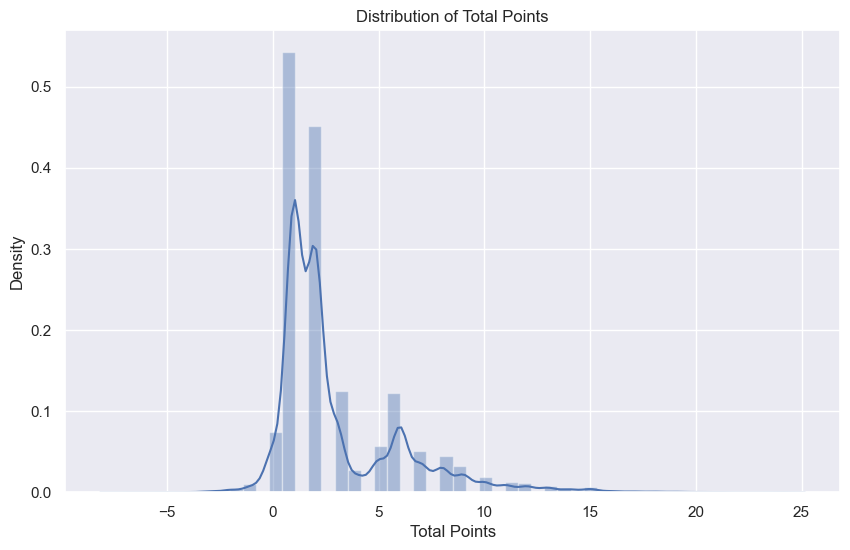

In [253]:
#Analysing distribution of total points using sns distplot
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(10,6)})
sns.distplot(merged_data.total_points)
plt.xlabel('Total Points')
plt.title('Distribution of Total Points')
plt.show()

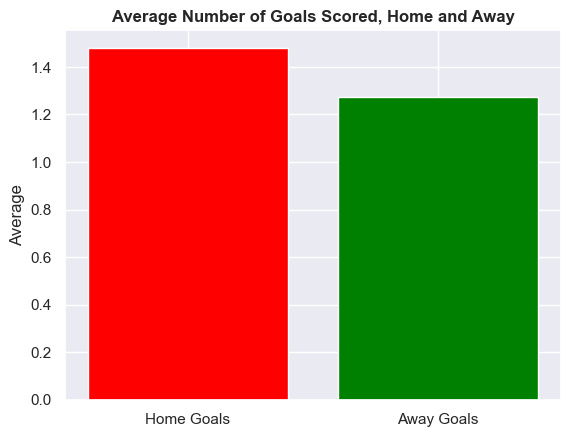

In [248]:
#Plotting sum of home and away goals across all seasons
avg_home_score = merged_data['h_score'].mean()
avg_away_score = merged_data['a_score'].mean()

x = [1, 2]
y = [avg_home_score, avg_away_score]
colors = ['red', 'green']

plt.bar(x, y, color=colors)
plt.title('Average Number of Goals Scored, Home and Away', fontweight='bold')
plt.xticks(ticks=x, labels=["Home Goals", "Away Goals"])
plt.ylabel("Average")
plt.show()


In [138]:
#Turning 'home' and 'away' into players team and opponent team for analysis

merged_data['players_team_spi'] = merged_data.apply(lambda row: row.h_team_spi if row.was_home == 1 else row.a_team_spi, axis=1)
merged_data['opponent_spi'] = merged_data.apply(lambda row: row.a_team_spi if row.was_home == 1 else row.h_team_spi, axis=1)
merged_data['opp_adv_spi'] = merged_data['opponent_spi'] - merged_data['players_team_spi']
merged_data['prob_players_team_win'] = merged_data.apply(lambda row: row.prob_h_win if row.was_home == 1 else row.prob_a_win, axis=1)
merged_data['prob_oppn_win'] = merged_data.apply(lambda row: row.prob_a_win if row.was_home == 1 else row.prob_h_win, axis=1)
merged_data['players_team_proj_score'] = merged_data.apply(lambda row: row.h_proj_score if row.was_home == 1 else row.a_proj_score, axis=1)
merged_data['oppn_team_proj_score'] = merged_data.apply(lambda row: row.a_proj_score if row.was_home == 1 else row.h_proj_score, axis=1)
merged_data['importance_player'] = merged_data.apply(lambda row: row.importance_h if row.was_home == 1 else row.importance_a, axis=1)
merged_data['importance_oppn'] = merged_data.apply(lambda row: row.importance_a if row.was_home == 1 else row.importance_h, axis=1)
merged_data['points_per_90'] = merged_data['total_points']/(90/merged_data['minutes'])



/var/folders/1k/45vk_vqn0z174f0vwyd90vqr0000gn/T/ipykernel_23256/2547690364.py:26: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


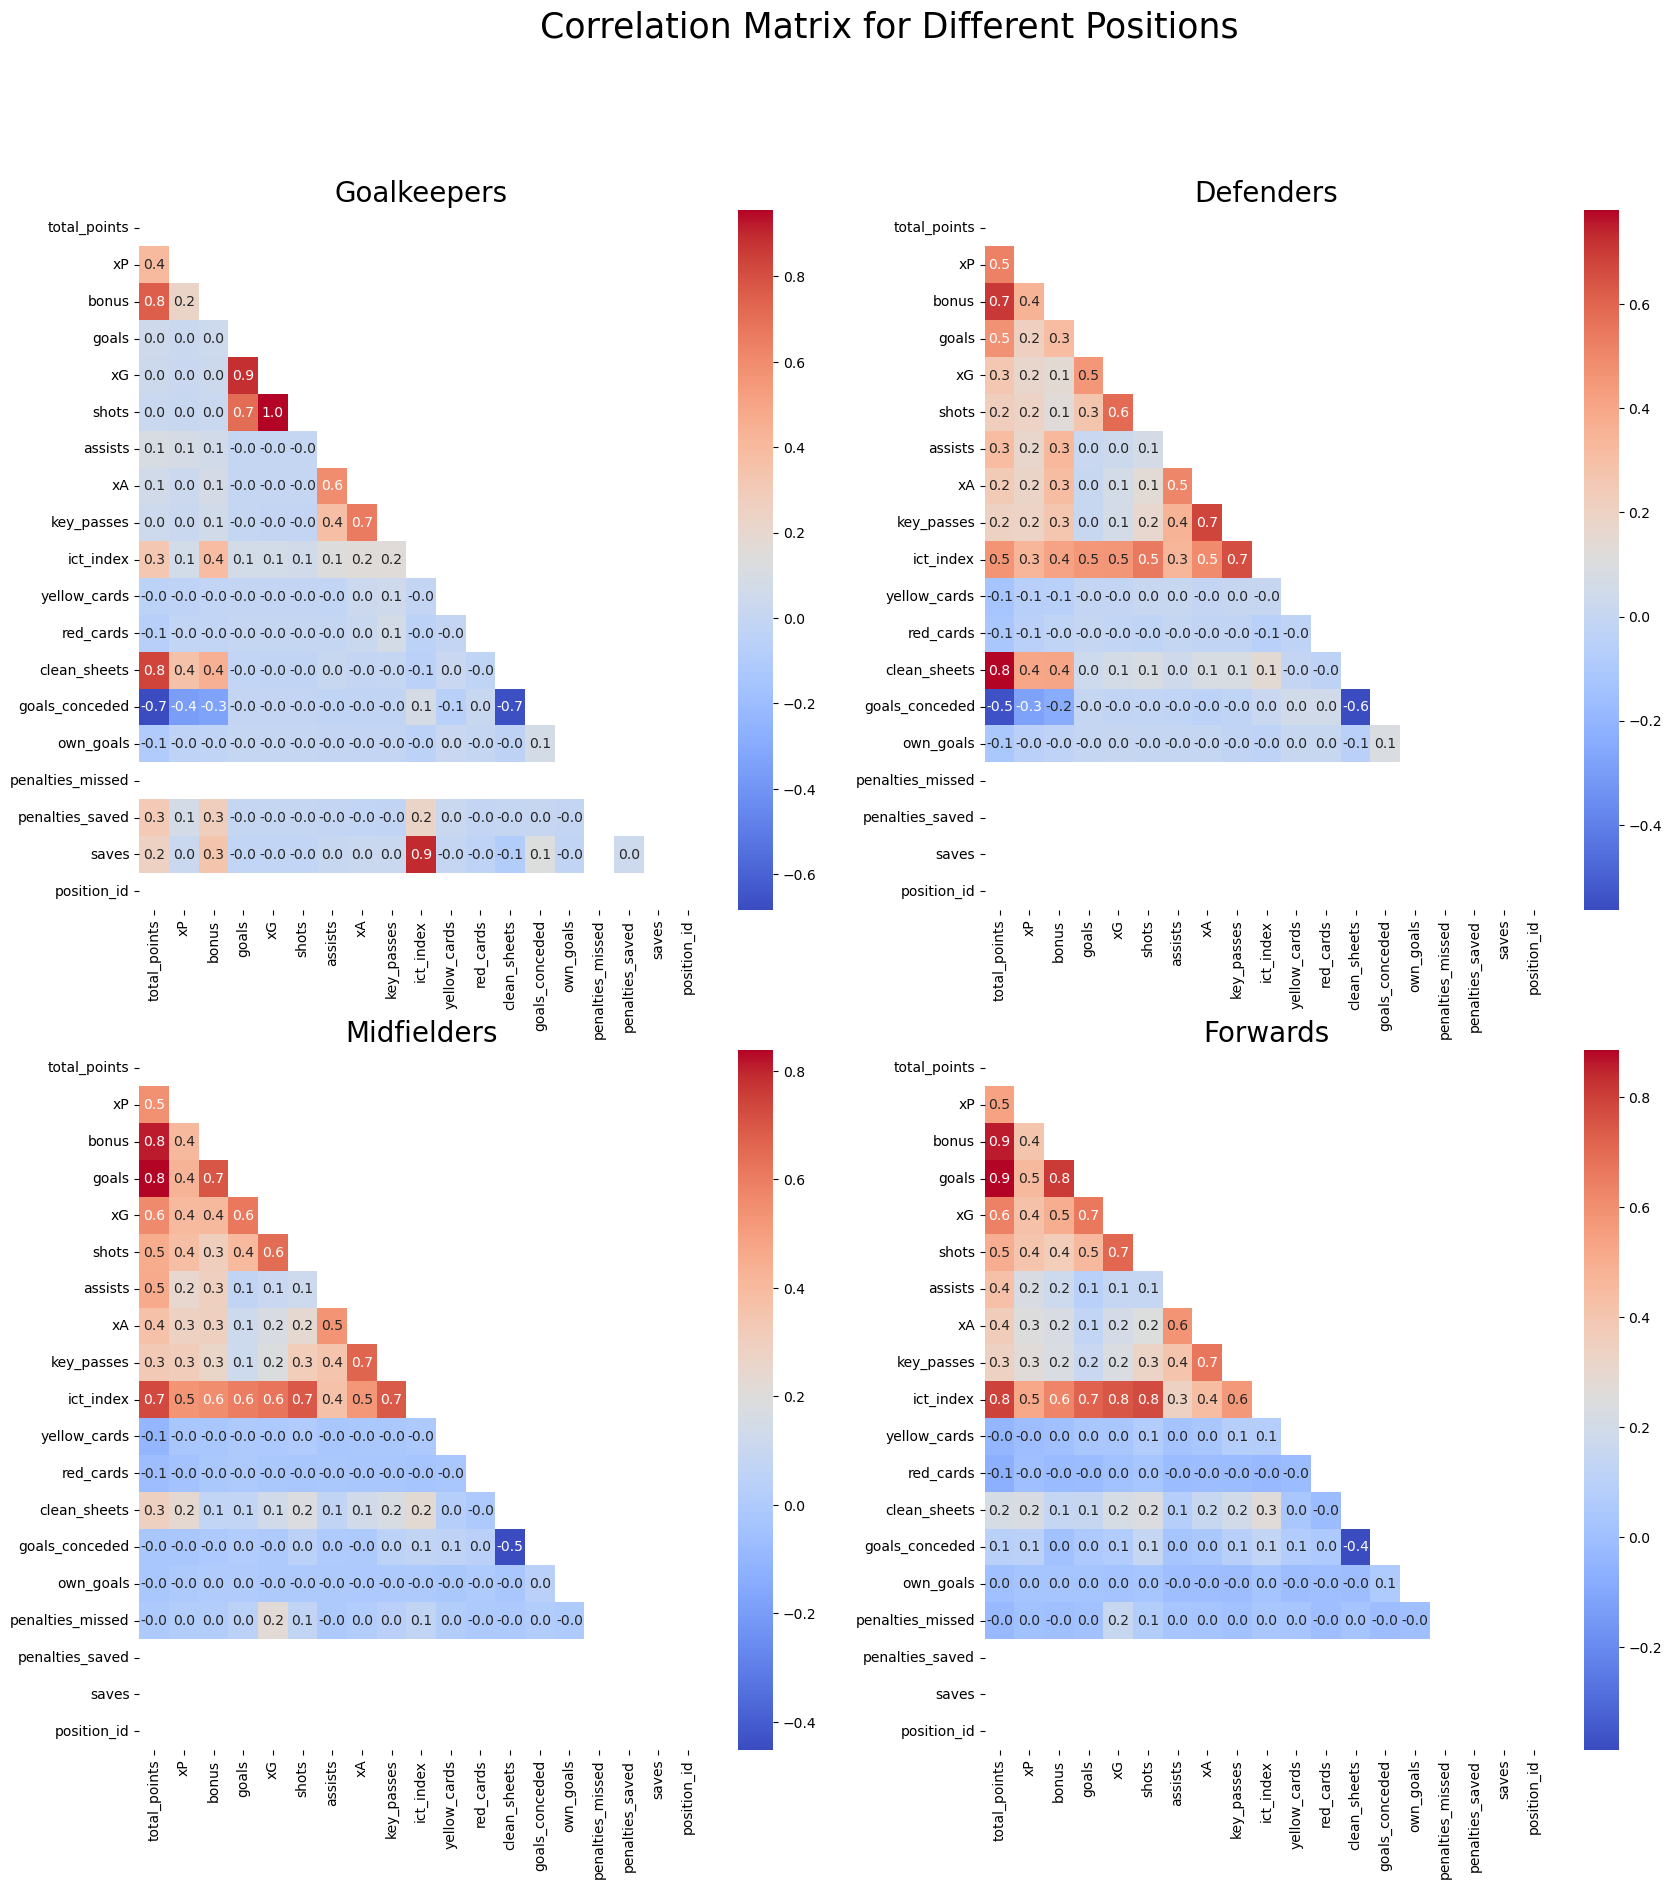

In [134]:
#Corrolation Matrix for Player performance Data

#sixty_mins = merged_data[merged_data['minutes'] > 59] -- use if filterring by minutes player
player_perf_data = merged_data[['total_points','xP','bonus','goals','xG','shots','assists', 'xA',
                          'key_passes', 'ict_index', 'yellow_cards','red_cards','clean_sheets','goals_conceded','own_goals','penalties_missed','penalties_saved','saves',
                          'position_id']]

player_perf_data_GKP = player_perf_data[player_perf_data['position_id'] == 4]
player_perf_data_DEF = player_perf_data[player_perf_data['position_id'] == 2]
player_perf_data_MID = player_perf_data[player_perf_data['position_id'] == 1]
player_perf_data_FWD = player_perf_data[player_perf_data['position_id'] == 3]

# Define subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
# Flatten axes
axes = axes.flatten()

# Define titles for each subplot
titles = ['Goalkeepers', 'Defenders', 'Midfielders', 'Forwards']

# Iterate through each position and plot heatmap on corresponding subplot
for i, position in enumerate([player_perf_data_GKP, player_perf_data_DEF, player_perf_data_MID, player_perf_data_FWD]):
    # Create corr matrix
    corr_matrix = position.corr()
    # Create mask to hide upper triangle
    mask = np.zeros_like(corr_matrix, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    #Create heatmap
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.1f', cmap='coolwarm', annot_kws={'size': 10}, ax=axes[i])
    #Set titles
    axes[i].set_title(titles[i], fontsize=20)

# Set overall title for the plot
plt.suptitle('Correlation Matrix for Different Positions', fontsize=25)
plt.show()


/var/folders/1k/45vk_vqn0z174f0vwyd90vqr0000gn/T/ipykernel_23256/3433727080.py:29: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


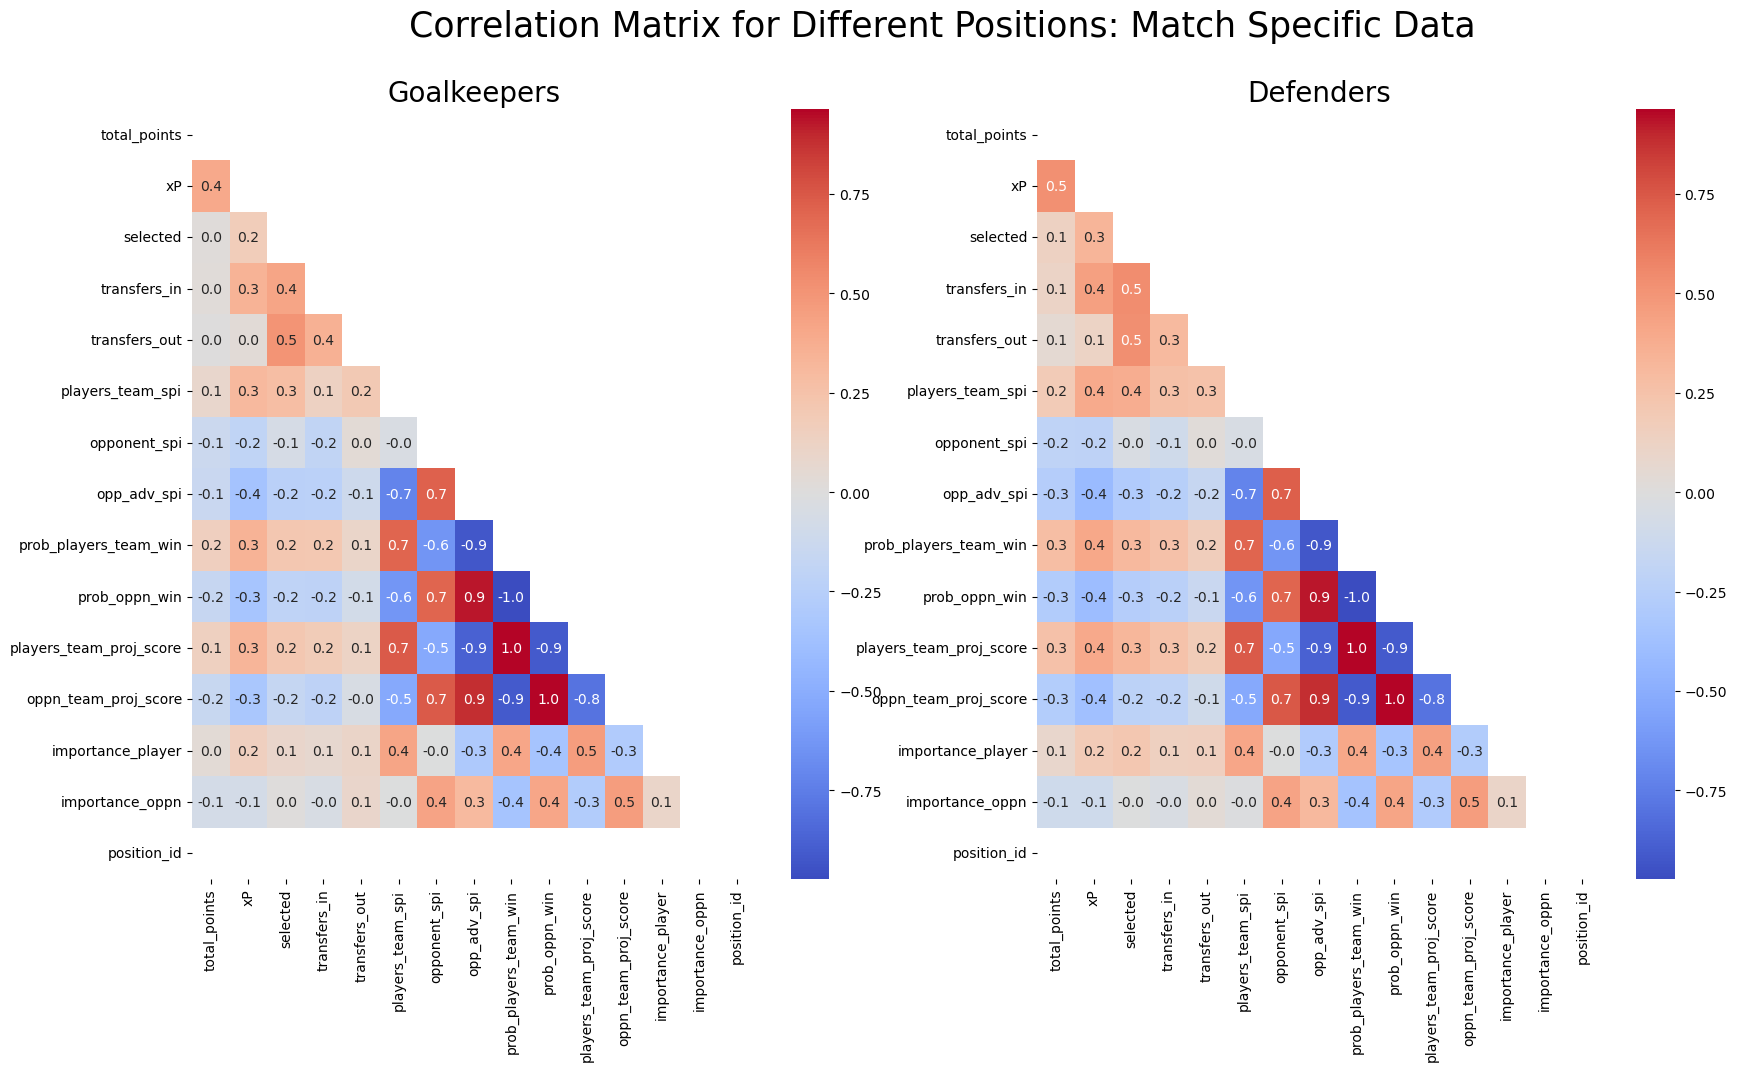

In [139]:
#Corrolation Matrix for Match Specific Data GKP and DEF only

#sixty_mins = merged_data[merged_data['minutes'] > 59] -- use if filterring by minutes player
match_specific_vars = merged_data[['total_points', 'xP','selected', 'transfers_in',
       'transfers_out', 'players_team_spi', 'opponent_spi',
       'opp_adv_spi', 'prob_players_team_win', 'prob_oppn_win',
       'players_team_proj_score', 'oppn_team_proj_score', 'importance_player',
       'importance_oppn', 'position_id']]

match_specific_vars_GKP = match_specific_vars[match_specific_vars['position_id'] == 4]
match_specific_vars_DEF = match_specific_vars[match_specific_vars['position_id'] == 2]
match_specific_vars_MID = match_specific_vars[match_specific_vars['position_id'] == 1]
match_specific_vars_FWD = match_specific_vars[match_specific_vars['position_id'] == 3]

# Define subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Flatten axes
axes = axes.flatten()

# Define titles for each subplot
titles = ['Goalkeepers', 'Defenders']

# Iterate through each position and plot heatmap on corresponding subplot
for i, position in enumerate([match_specific_vars_GKP, match_specific_vars_DEF]):
    # Create corr matrix
    corr_matrix = position.corr()
    # Create mask to hide upper triangle
    mask = np.zeros_like(corr_matrix, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    #Create heatmap
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.1f', cmap='coolwarm', annot_kws={'size': 10}, ax=axes[i])
    #Set titles
    axes[i].set_title(titles[i], fontsize=20)

# Set overall title for the plot
plt.suptitle('Correlation Matrix for Different Positions: Match Specific Data', fontsize=25)
plt.show()

/var/folders/1k/45vk_vqn0z174f0vwyd90vqr0000gn/T/ipykernel_23256/4230868286.py:18: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


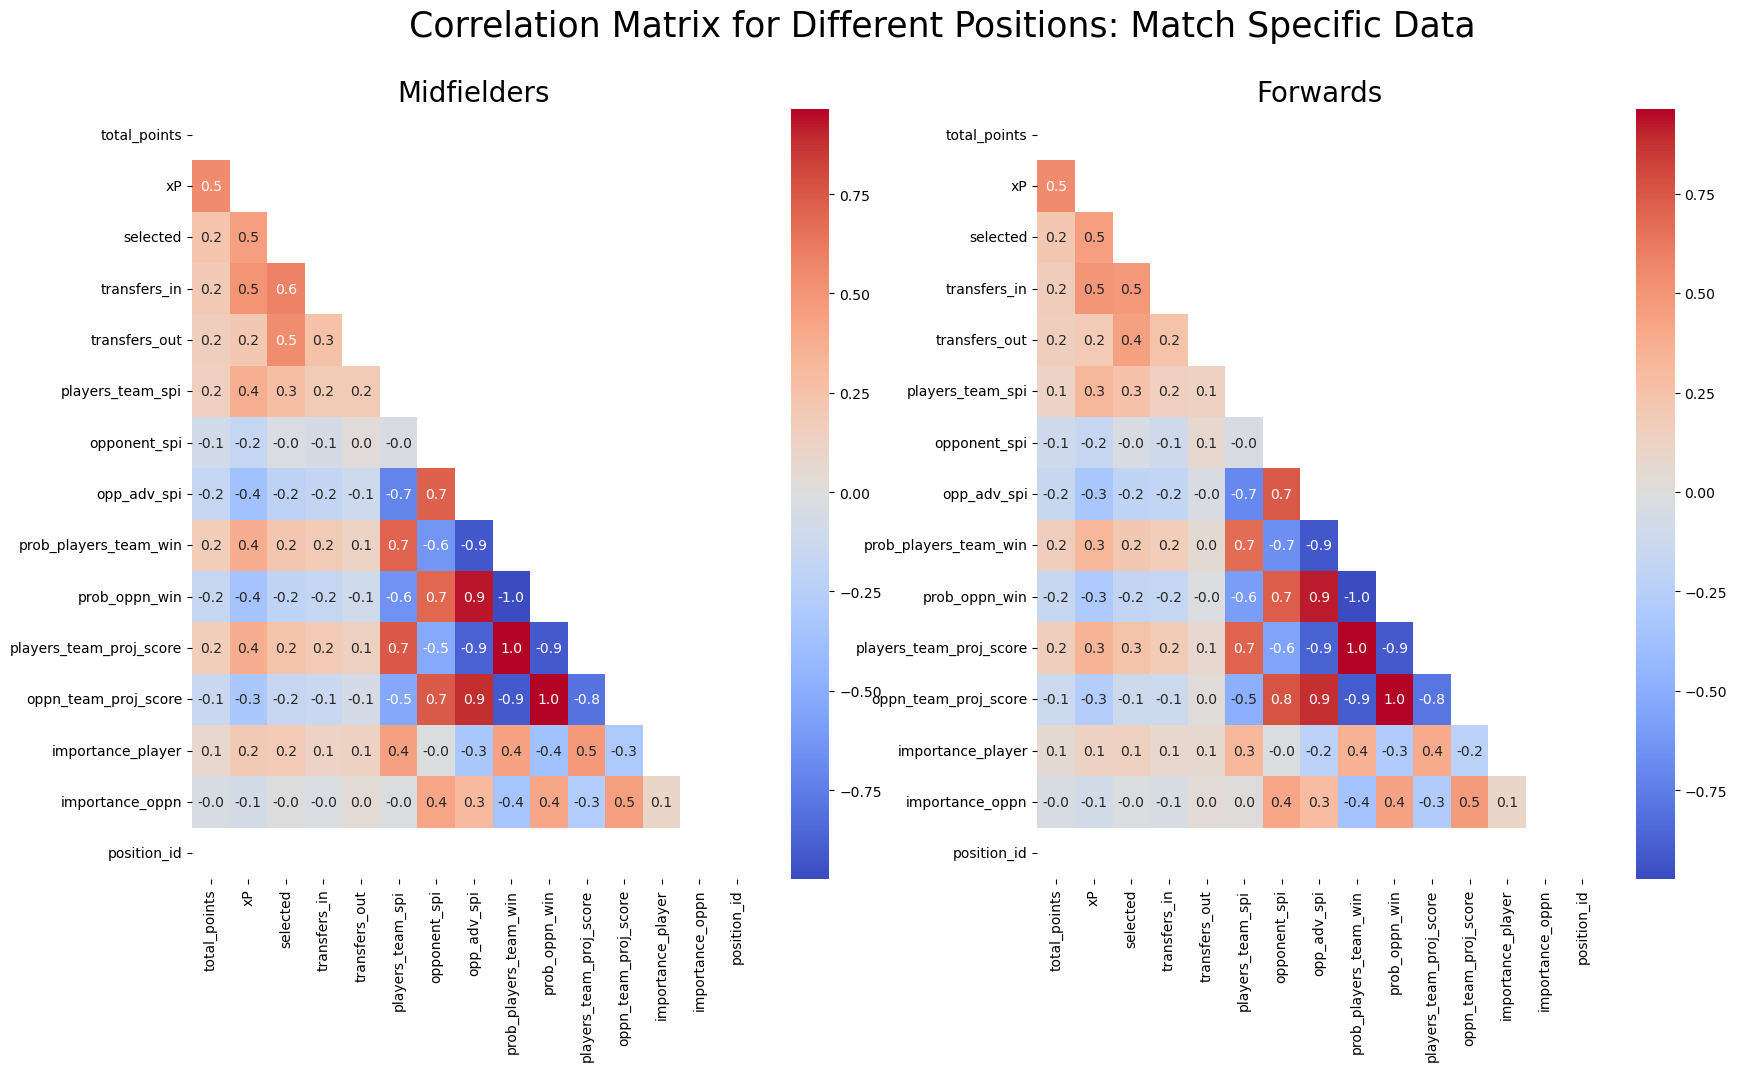

In [135]:
#Corrolation Matrix for Match Specific Data MID and FWD only

#sixty_mins = merged_data[merged_data['minutes'] > 59] -- use if filterring by minutes player

# Define subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
# Flatten axes
axes = axes.flatten()

# Define titles for each subplot
titles = ['Midfielders', 'Forwards']

# Iterate through each position and plot heatmap on corresponding subplot
for i, position in enumerate([match_specific_vars_MID, match_specific_vars_FWD]):
    # Create corr matrix
    corr_matrix = position.corr()
    # Create mask to hide upper triangle
    mask = np.zeros_like(corr_matrix, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    #Create heatmap
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.1f', cmap='coolwarm', annot_kws={'size': 10}, ax=axes[i])
    #Set titles
    axes[i].set_title(titles[i], fontsize=20)

# Set overall title for the plot
plt.suptitle('Correlation Matrix for Different Positions: Match Specific Data', fontsize=25)
plt.show()

In [136]:
#Plotting Opponents SPI Advantage vs. Total Points, Grouped by Player ID
#Group data
grouped_opp_spi = merged_data.groupby(['player_id'], as_index=False).agg({
    'opp_adv_spi': 'mean',
    'total_points': 'mean'
})


corr = grouped_opp_spi['opp_adv_spi'].corr(grouped_opp_spi['total_points'])
print('Correlation:', corr)

#Define plot
fig, ax = plt.subplots()

# Quadrant boundaries
ax.axvline(x=0, color='gray', linewidth=0.5)
ax.axhline(y=0, color='gray', linewidth=0.5)

# Scatter plot
ax.scatter(grouped_opp_spi['opp_adv_spi'], grouped_opp_spi['total_points'])

# Calculate regression line
x = grouped_opp_spi['opp_adv_spi']
y = grouped_opp_spi['total_points']
m, b = np.polyfit(x, y, 1)
reg_line = np.poly1d((m, b))

# Plot regression line
ax.plot(x, reg_line(x), color='red')

# Set axis labels and title
ax.set_xlabel('Opponent Adv. SPI')
ax.set_ylabel('Total Points')
ax.set_title('Opponents SPI Advantage vs. Total Points, Grouped by Player ID')
plt.show()



KeyError: "Column(s) ['opp_adv_spi'] do not exist"

In [ ]:
#Filtering players with less than 60 minutes
filtered_minutes = merged_data[merged_data['minutes'] > 59]

#Grouping data for Graph
grouped_opp_spi = merged_data.groupby(['player_id'], as_index=False).agg({
    'opp_adv_spi': 'mean',
    'total_points': 'mean'
})

#Removing Outliers
stats = grouped_opp_spi.describe().transpose()
stats['IQR'] = stats['75%'] - stats['25%']

outliers = pd.DataFrame(columns=grouped_opp_spi.columns)

for col in stats.index:
    iqr = stats.at[col,'IQR']
    cutoff = iqr * 1.5
    lower = stats.at[col,'25%'] - cutoff
    upper = stats.at[col,'75%'] + cutoff
    results = grouped_opp_spi[(grouped_opp_spi[col] < lower) | 
                   (grouped_opp_spi[col] > upper)].copy()
    results['Outlier'] = col
    outliers = outliers.append(results)

outliers = list(outliers.index)
grouped_opp_spi = grouped_opp_spi.drop(outliers)

#Plot for minutes fimtered and outliers removed

corr = grouped_opp_spi['opp_adv_spi'].corr(grouped_opp_spi['total_points'])
print('Correlation:', corr)

fig, ax = plt.subplots()

# Quadrant boundaries
ax.axvline(x=0, color='gray', linewidth=0.5)
ax.axhline(y=0, color='gray', linewidth=0.5)

# Scatter plot
ax.scatter(grouped_opp_spi['opp_adv_spi'], grouped_opp_spi['total_points'])

# Calculate regression line
x = grouped_opp_spi['opp_adv_spi']
y = grouped_opp_spi['total_points']
m, b = np.polyfit(x, y, 1)
reg_line = np.poly1d((m, b))

# Plot regression line
ax.plot(x, reg_line(x), color='red')

# Set axis labels and title
ax.set_xlabel('Opponent Adv. SPI')
ax.set_ylabel('Total Points')
ax.set_title('Opponents SPI Advantage vs. Total Points, Grouped by Player ID\nFiltered for Minutes > 60 and Outliers Removed')
plt.show()


In [266]:
#Creating lagged varibaled and lagged moving average varibales for total points and xP
#Sort values by player_id and date
form_data = merged_data.sort_values(['player_id', 'date'])

#Total points
form_data['points_n-1'] = form_data.groupby('player_id')['total_points'].shift(1) #Lagged once
form_data['points_n-2'] = form_data.groupby('player_id')['total_points'].shift(2) #Lagged twice
form_data['points_n-3'] = form_data.groupby('player_id')['total_points'].shift(3)
form_data['points_n-4'] = form_data.groupby('player_id')['total_points'].shift(4)
form_data['points_n-2_avg'] = (form_data['points_n-2'] + form_data['points_n-1'])/2
form_data['points_n-3_avg'] = (form_data['points_n-2'] + form_data['points_n-1'] + form_data['points_n-3'])/3
form_data['points_n-4_avg'] = (form_data['points_n-2'] + form_data['points_n-1'] + form_data['points_n-3'] + form_data['points_n-4'])/4

#xP
form_data['xP_n-1'] = form_data.groupby('player_id')['xP'].shift(1)
form_data['xP_n-2'] = form_data.groupby('player_id')['xP'].shift(2)
form_data['xP_n-3'] = form_data.groupby('player_id')['xP'].shift(3)
form_data['xP_n-4'] = form_data.groupby('player_id')['xP'].shift(4)
form_data['xP_n-2_avg'] = (form_data['xP_n-2'] + form_data['xP_n-1'])/2
form_data['xP_n-3_avg'] = (form_data['xP_n-2'] + form_data['xP_n-1'] + form_data['xP_n-3'])/3
form_data['xP_n_4_avg'] = (form_data['xP_n-2'] + form_data['xP_n-1'] + form_data['xP_n-3'] + form_data['xP_n-4'])/4


# Select only the desired columns
form_data_points = form_data[['total_points','points_n-1', 'points_n-2_avg', 'points_n-3_avg', 'points_n-4_avg']].round(2)
form_data_xP = form_data[['total_points','xP_n-1', 'xP_n-2_avg', 'xP_n-3_avg', 'xP_n_4_avg']].round(2)

/var/folders/1k/45vk_vqn0z174f0vwyd90vqr0000gn/T/ipykernel_10113/187902445.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix_total_points, dtype=np.bool)
/var/folders/1k/45vk_vqn0z174f0vwyd90vqr0000gn/T/ipykernel_10113/187902445.py:17: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix_

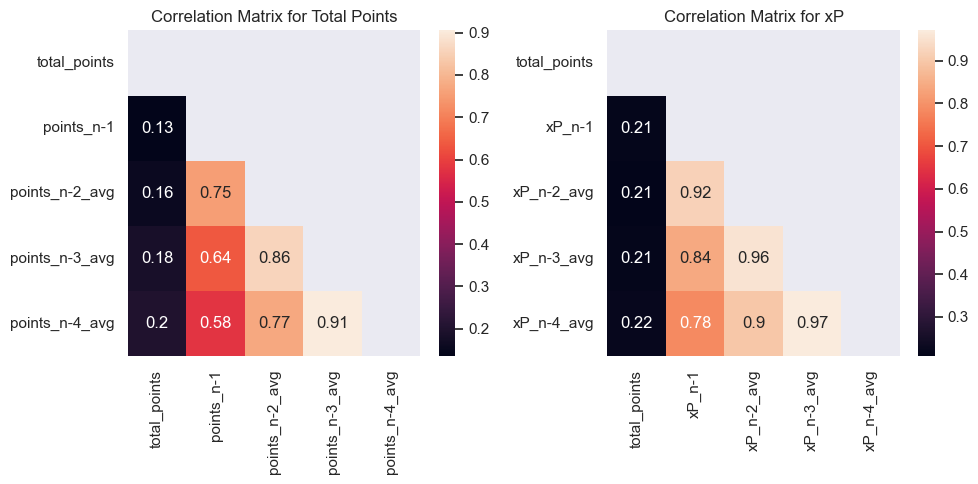

In [224]:

# Compute the correlation matrices
corr_matrix_total_points = form_data_points.corr()
corr_matrix_xP = form_data_xP.corr()

# Create mask to hide upper triangle
mask = np.zeros_like(corr_matrix_total_points, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Create the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Draw the first heatmap on the first subplot
sns.heatmap(corr_matrix_total_points, mask=mask, annot=True, ax=axs[0])
axs[0].set_title('Correlation Matrix for Total Points')

# Update the mask for the second correlation matrix
mask = np.zeros_like(corr_matrix_xP, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the second heatmap on the second subplot
sns.heatmap(corr_matrix_xP, mask=mask, annot=True, ax=axs[1])
axs[1].set_title('Correlation Matrix for xP')

# Show the plot
plt.tight_layout()
plt.show()


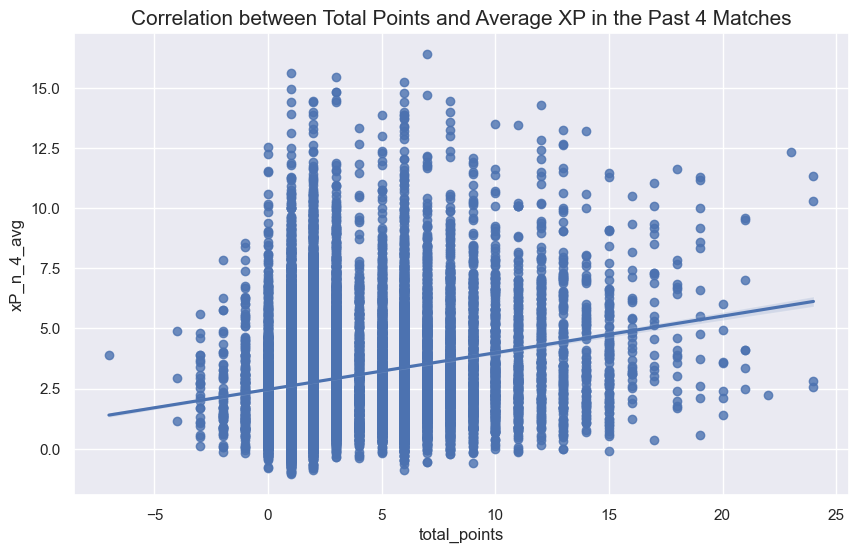

In [269]:
#Plotting Correlation between Total Points and Average XP in the Past 4 Matches
sns.regplot(x=form_data_xP.total_points,y=form_data_xP.xP_n_4_avg)
plt.title('Correlation between Total Points and Average XP in the Past 4 Matches', fontsize=15)
plt.show()

In [230]:
#Defining function to make lagged 4 week moving average for other player performance variables
form_data = merged_data.sort_values(['player_id', 'date'])

def average_form(var):
    form_data[var+'_avg4'] = ((form_data.groupby('player_id')[var].shift(1)) + (form_data.groupby('player_id')[var].shift(2)) + (form_data.groupby('player_id')[var].shift(3)) + (form_data.groupby('player_id')[var].shift(4)))/4

average_form('goals')
average_form('assists')
average_form('xG')
average_form('xA')

In [234]:
corr_goals = form_data[['total_points', 'goals','goals_avg4', 'xG', 'xG_avg4']].round(2)
corr_assists = form_data[['total_points', 'assists','assists_avg4', 'xA', 'xA_avg4']].round(2)



/var/folders/1k/45vk_vqn0z174f0vwyd90vqr0000gn/T/ipykernel_10113/3899404706.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix_goals, dtype=np.bool)
/var/folders/1k/45vk_vqn0z174f0vwyd90vqr0000gn/T/ipykernel_10113/3899404706.py:17: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix_assis

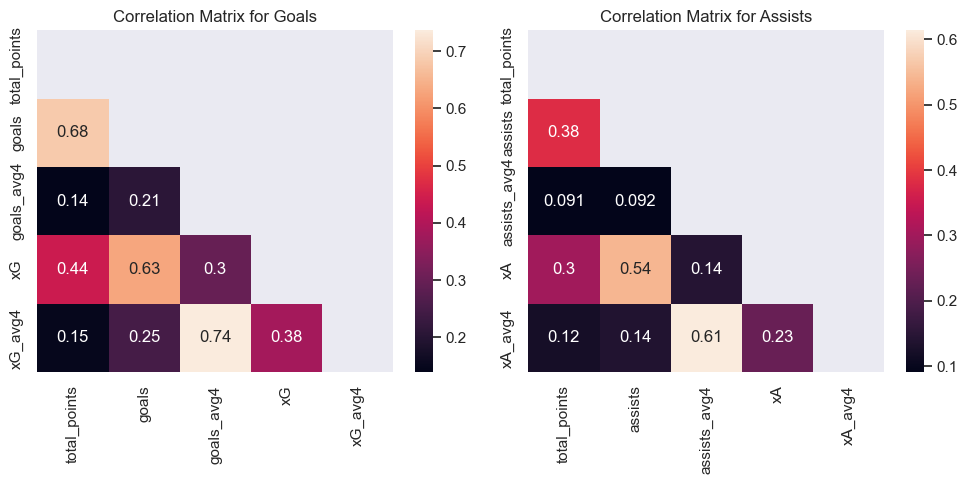

In [235]:
# Compute the correlation matrices
corr_matrix_goals = corr_goals.corr()
corr_matrix_assists = corr_assists.corr()

# Create mask to hide upper triangle
mask = np.zeros_like(corr_matrix_goals, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Create the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Draw the first heatmap on the first subplot
sns.heatmap(corr_matrix_goals, mask=mask, annot=True, ax=axs[0])
axs[0].set_title('Correlation Matrix for Goals')

# Update the mask for the second correlation matrix
mask = np.zeros_like(corr_matrix_assists, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the second heatmap on the second subplot
sns.heatmap(corr_matrix_assists, mask=mask, annot=True, ax=axs[1])
axs[1].set_title('Correlation Matrix for Assists')

# Show the plot
plt.tight_layout()
plt.show()
